# Load Packages

In [1]:
#Homemade Functions
from functions.functions_analysis import *
from functions.Path_combine_function import *
from functions.plot_functions import *
from functions.Preproc_functions import *

#More nifti packages
from nilearn import plotting
import nibabel as nib
import ants

# Dipy
import dipy as dp
from dipy.io.image import load_nifti, save_nifti
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
import dipy.data as dpd

#Preproc
from dipy.align import motion_correction
import dipy.direction.peaks as dpp
from dipy.viz import window, actor
from dipy.segment.mask import median_otsu
from dipy.core.histeq import histeq


#DIPY Plot
from dipy.viz import window, actor
from dipy.data import get_sphere

#Regular Packages
import keyboard  # For detecting keypresses
import IPython

import numpy as np
import os

from pathlib import Path
from time import time
import time  # For simulating work
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import scipy.io

# **NOTE TO SELF REGARDING IMSHOW:**
When using **plt.imshow()** in Matplotlib, the default behavior is that:

**The first array dimension** (rows, corresponding to the y-axis) is mapped to the vertical axis.

**The second array dimension** (columns, corresponding to the x-axis) is mapped to the horizontal axis.

This is because NumPy arrays are indexed as (row, column), but in Cartesian coordinates, we think of (x, y) as (column, row).

**Proper Dimensions for NIfTI Files:**

MRI NIfTI files typically store 3D or 4D volumes with dimensions in the following order:

Spatial Dimensions (X, Y, Z):

\- X-axis: Right-to-Left (R → L)

\- Y-axis: Anterior-to-Posterior (A → P)

\- Z-axis: Inferior-to-Superior (I → S)

These represent the physical directions along which the data is aligned in real-world space.


**Time Dimension (Optional, T):** If the NIfTI file is 4D, the 4th dimension represents time, often used in fMRI, DTI, or dynamic imaging.
Thus, the file dimensions can be:

\- 3D: (𝑋,𝑌,𝑍)

\- 4D: (𝑋,𝑌,𝑍,𝑇)

# Save and combine NIFTI files (masks, RARE2d anatomical, and dwMRI)

### **Combine:** Binary Mask Images: 

This IS BAD!!!! Just create a new mask of the combined images!

In [ ]:
mask_file_paths = PathFinder("mask.npy")
mask_list = Combine_NIFTI(mask_file_paths)

#save
np.save(arr = mask_list,file = 'C:/DTI_SC/humanSC_400h/Combined_Data/MASK_combined.npy')

#Transpose
mask_transposed = np.transpose(mask_list, axes = (1,0,2))
np.save(arr = mask_transposed,file = 'C:/DTI_SC/humanSC_400h/Combined_Data/MASK_combined_trans.npy')

['C:/DTI_SC/humanSC_400h\\190805-HumanSC\\88-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190805-HumanSC\\91-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190805-HumanSC\\94-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190805-HumanSC\\97-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190807-HumanSC\\100-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190807-HumanSC\\103-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190807-HumanSC\\106-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190807-HumanSC\\109-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190809-HumanSC\\112-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190809-HumanSC\\115-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190809-HumanSC\\118-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190809-HumanSC\\121-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190812-HumanSC\\124-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190812-HumanSC\\127-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190812-HumanSC\\130-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\190812-HumanSC\\133-nii\\mask.npy', 'C:/DTI_SC/humanSC_400h\\19

## **Combine:** Anatomical Images

**Combine using Cosine Blend:**

Here we combine the images by using a cosine function across the overlapping regions.

In [ ]:
######## Combine with cosine blend ############

# Non Pre-Proc
file_paths = PathFinder("RARE_2D_Ax.nii")
Combined_rare_blend = Combine_NIFTI_blend(file_paths= file_paths, overlap_slices= 10 , blend= "cosine")
ants.image_write(Combined_rare_blend, "Combined_Data/RARE_combined_blend.nii.gz")

# Pre-proc 
file_paths = PathFinder("RARE_2D_Ax_preproc.nii")
Combined_rare_preproc_blend = Combine_NIFTI_blend(file_paths= file_paths, overlap_slices= 10 , blend= "cosine")
ants.image_write(Combined_rare_preproc_blend, "Combined_Data/RARE_preproc_combined_blend.nii.gz")



#### Transpose ###
# Non Pre-proc
Combined_rare_blend_transposed = np.transpose(Combined_rare_blend.numpy(), axes = (1,0,2))
Combined_rare_blend_transposed_ants = ants.from_numpy(Combined_rare_blend_transposed, 
                                                      origin = Combined_rare_blend.origin, 
                                                      spacing = Combined_rare_blend.spacing, direction = 
                                                      Combined_rare_blend.direction)

ants.image_write(Combined_rare_blend_transposed_ants , "Combined_Data/Transposed/RARE_combined_blend_trans.nii.gz")


#preproc
Combined_rare_preproc_blend_transposed = np.transpose(Combined_rare_preproc_blend.numpy(), axes = (1,0,2))
Combined_rare_preproc_blend_transposed_ants = ants.from_numpy(Combined_rare_preproc_blend_transposed,
                                                               origin = Combined_rare_preproc_blend.origin, 
                                                               spacing = Combined_rare_preproc_blend.spacing, 
                                                               direction = Combined_rare_preproc_blend.direction)

ants.image_write(Combined_rare_preproc_blend_transposed_ants , "Combined_Data/Transposed/RARE_preproc_combined_blend_trans.nii.gz")

**Combine without blend:**
Here we simply combine the sections

In [ ]:
############## NON PRE-PROC #####################
rare_file_paths = PathFinder("RARE_2D_Ax.nii")

#### COMBINE Files ##### 
outpath = 'C:/DTI_SC/humanSC_400h/Combined_Data/RARE_combined.nii.gz' 
if os.path.isfile(outpath):
    print(f"File Exist: Loading... {outpath} ")
    RARE_combined, affine = load_nifti(outpath)
else:    
    print(f"{outpath} didnt exist, starting generation")
    RARE_combined, affine = Combine_NIFTI(rare_file_paths)
    RARE_combined_nifti = nib.Nifti1Image(RARE_combined,   affine = affine)
    nib.save(RARE_combined_nifti, outpath)

#### TRANSPOSE x and y #### 
outpath = 'C:/DTI_SC/humanSC_400h/Combined_Data/Transposed/RARE_combined_trans.nii.gz' 
if os.path.isfile(outpath):
    print(f"File Exist: Loading... {outpath} ")
    RARE_combined_trans, affine =  load_nifti(outpath)
else:
    print(f"{outpath} didnt exist, starting to generation")
    RARE_combined_trans = np.transpose(RARE_combined, axes = (1,0,2))
    #Save the data 
    data_combined_nifti_trans = nib.Nifti1Image(RARE_combined_trans,   affine = affine)
    nib.save(data_combined_nifti_trans, outpath)


### FLIP Y-axis and Save ###
outpath = 'C:/DTI_SC/humanSC_400h/Combined_Data/Transposed and Flipped Axis/RARE_combined_trans_flipped.nii.gz'
if os.path.isfile(outpath):
    print(f"File Exist: Loading... {outpath} ")
    RARE_combined_trans_flipped, affine =  load_nifti(outpath)
else:
    print(f"{outpath} didnt exist, starting to generation")
    RARE_combined_trans_flipped = np.flip(RARE_combined_trans, axis = 0)
    RARE_yflipped_nifti = nib.Nifti1Image(RARE_combined_trans_flipped,   affine = affine)
    nib.save(RARE_yflipped_nifti, outpath)

In [ ]:

############## PREPROC #############
rare_file_paths = PathFinder("RARE_2D_Ax_preproc.nii")

#### COMBINE Files ##### 
outpath = 'C:/DTI_SC/humanSC_400h/Combined_Data/RARE_preproc_combined.nii.gz' 
if os.path.isfile(outpath):
    print(f"File Exist: Loading... {outpath} ")
    RARE_combined, affine = load_nifti(outpath)
else:    
    print(f"{outpath} didnt exist, starting generation")
    RARE_combined, affine = Combine_NIFTI(rare_file_paths, crop_z= False)
    RARE_combined_nifti = nib.Nifti1Image(RARE_combined,   affine = affine)
    nib.save(RARE_combined_nifti, outpath)

#### TRANSPOSE x and y #### 
outpath = 'C:/DTI_SC/humanSC_400h/Combined_Data/Transposed/RARE_preproc_combined_trans.nii.gz' 
if os.path.isfile(outpath):
    print(f"File Exist: Loading... {outpath} ")
    RARE_combined_trans, affine =  load_nifti(outpath)
else:
    print(f"{outpath} didnt exist, starting to generation")
    RARE_combined_trans = np.transpose(RARE_combined, axes = (1,0,2))
    #Save the data 
    data_combined_nifti_trans = nib.Nifti1Image(RARE_combined_trans,   affine = affine)
    nib.save(data_combined_nifti_trans, outpath)

### FLIP Y-axis and Save ###
outpath = 'C:/DTI_SC/humanSC_400h/Combined_Data/Transposed and Flipped Axis/RARE_preproc_combined_trans_flipped.nii.gz'
if os.path.isfile(outpath):
    print(f"File Exist: Loading... {outpath} ")
    RARE_combined_trans_flipped, affine =  load_nifti(outpath)
else:
    print(f"{outpath} didnt exist, starting to generation")
    RARE_combined_trans_flipped = np.flip(RARE_combined_trans, axis = 0)
    RARE_yflipped_nifti = nib.Nifti1Image(RARE_combined_trans_flipped,   affine = affine)
    nib.save(RARE_yflipped_nifti, outpath)

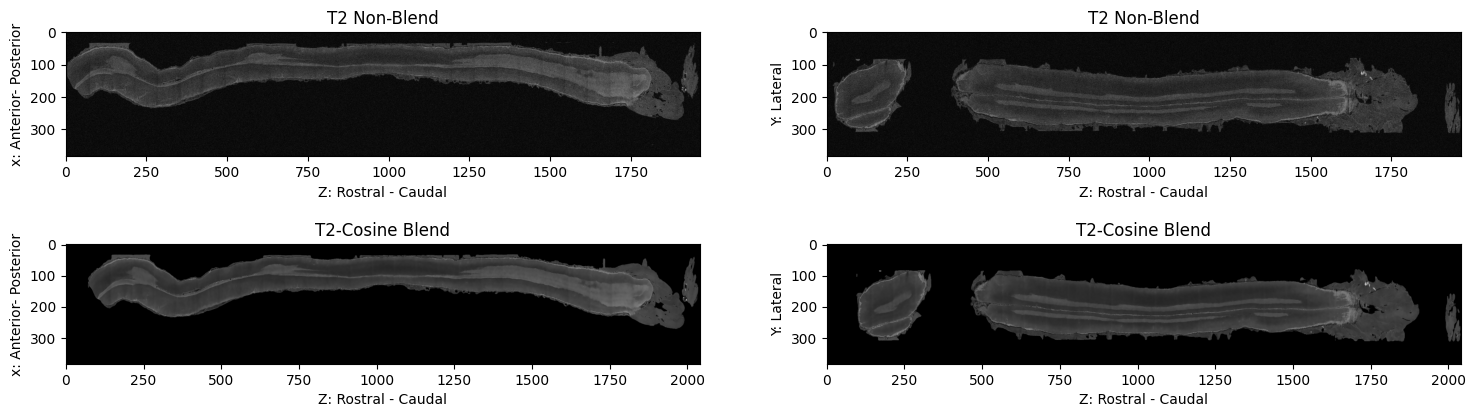

In [ ]:
t2, affine = load_nifti('Combined_Data/Transposed/RARE_preproc_combined_trans.nii.gz') 
t2_blend, affine = load_nifti("Combined_Data/Transposed/RARE_preproc_combined_blend_trans.nii.gz")

x = 80
y =  180
#Plot Saggital and Coronal Slices:
plt.figure(figsize=(18, 5))
plt.subplot(2, 2, 1)
plt.imshow(t2[:,y,:], cmap = "gray")
plt.ylabel("x: Anterior- Posterior")
plt.xlabel("Z: Rostral - Caudal")
plt.title("T2 Non-Blend")

plt.subplot(2, 2, 2)
plt.imshow(t2[x,:,:], cmap='gray')
plt.ylabel("Y: Lateral")
plt.xlabel("Z: Rostral - Caudal")
plt.title("T2 Non-Blend")

#Plot Saggital and Coronal Slices:
plt.subplot(2, 2, 3)
plt.imshow(t2_blend[:,y,:], cmap = "gray")
plt.ylabel("x: Anterior- Posterior")
plt.xlabel("Z: Rostral - Caudal")
plt.title("T2-Cosine Blend")

plt.subplot(2, 2, 4)
plt.imshow(t2_blend[x,:,:], cmap='gray')
plt.ylabel("Y: Lateral")
plt.xlabel("Z: Rostral - Caudal")
plt.title("T2-Cosine Blend")
plt.show()

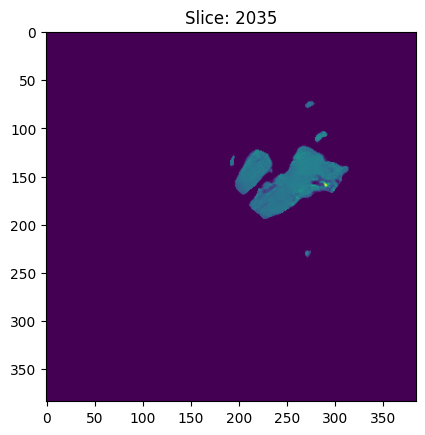

In [7]:
plot_all_slices(t2_blend, pause = .1, increment = 5)

**Combine the Bias Field Corrected Images:**

Here we combine the images that have been bias-field corrected prior to image stitching. (THIS TURNED OUT NOT TO BE THE WAY)

In [ ]:
#### Find all Files to combine #####
rare_file_paths = PathFinder("RARE_2D_Ax_preproc_BFC.nii.gz")

#### COMBINE Files ##### 
outpath = 'C:/DTI_SC/humanSC_400h/Combined_Data/RARE_BFC_combined.nii.gz' 
   
print(f"{outpath} didnt exist, starting generation")
RARE_combined, affine = Combine_NIFTI(rare_file_paths)
RARE_combined_nifti = nib.Nifti1Image(RARE_combined,   affine = affine)
nib.save(RARE_combined_nifti, outpath)


#### TRANSPOSE x and y #### 
outpath = 'C:/DTI_SC/humanSC_400h/Combined_Data/Transposed/RARE_BFC_combined_trans.nii.gz' 

RARE_combined_trans = np.transpose(RARE_combined, axes = (1,0,2))
#Save the data 
data_combined_nifti_trans = nib.Nifti1Image(RARE_combined_trans,   affine = affine)
nib.save(data_combined_nifti_trans, outpath)


### FLIP Y-axis and Save ###
outpath = 'C:/DTI_SC/humanSC_400h/Combined_Data/Transposed and Flipped Axis/RARE_BFC_combined_trans_flipped.nii.gz'
if os.path.isfile(outpath):
    print(f"File Exist: Loading... {outpath} ")
    RARE_combined_trans_flipped, affine =  load_nifti(outpath)
else:
    print(f"{outpath} didnt exist, starting to generation")
    RARE_combined_trans_flipped = np.flip(RARE_combined_trans, axis = 0)
    RARE_yflipped_nifti = nib.Nifti1Image(RARE_combined_trans_flipped,   affine = affine)
    nib.save(RARE_yflipped_nifti, outpath)

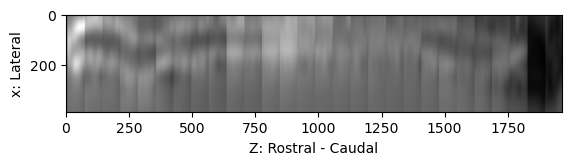

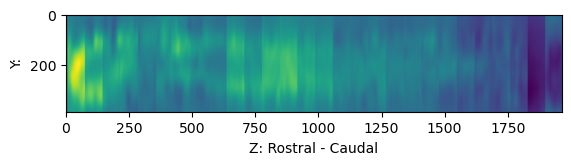

In [3]:
#Plot Saggital and Coronal Slices:
plt.imshow(RARE_combined_trans[:,180,:], "gray")
plt.ylabel("x: Lateral")
plt.xlabel("Z: Rostral - Caudal")
plt.show()

plt.imshow(RARE_combined_trans[60,:,:])
plt.ylabel("Y:")
plt.xlabel("Z: Rostral - Caudal")
plt.show()

So z-axis = 1750 is the cervical segment!! 

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot 1
axes[0, 0].imshow(RARE_combined[:, :, 150])
axes[0, 0].invert_yaxis()
axes[0, 0].set_xlabel("X (Rows): Ventral - Dorsal")
axes[0, 0].set_ylabel("Y (Col): Lateral")
axes[0, 0].set_title("RARE_RAW")

# Plot 2
axes[0, 1].imshow(RARE_combined_trans[:, :, 150])
axes[0, 1].invert_yaxis()
axes[0, 1].set_ylabel("X: Ventral - Dorsal")
axes[0, 1].set_xlabel("Y: Lateral")
axes[0, 1].set_title("RARE_trans")

# Plot 3
axes[1, 0].imshow(RARE_combined_trans_flipped[:, :, 150])
axes[1, 0].invert_yaxis()
axes[1, 0].set_ylabel("X: Dorsal- Ventral")
axes[1, 0].set_xlabel("Y: Lateral")
axes[1, 0].set_title("RARE_trans_yflipped")

# Hide the empty subplot
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


## **Combine:** DTI images


In [ ]:
######## Combine with cosine blend ############

# Pre-Proc
DTI_paths = PathFinder("gibbs_denoised_affine_ok.nii")
Combined_DTI_proproc_blend = Combine_NIFTI_blend(file_paths= DTI_paths, overlap_slices= 10 , blend= "cosine")
ants.image_write(Combined_DTI_proproc_blend, "Combined_Data/DTI_combined_preproc_blend.nii.gz")

# Non Pre-proc 
file_paths = PathFinder("Dti_SE.nii")
Combined_DTI_blend = Combine_NIFTI_blend(file_paths = file_paths, overlap_slices= 10 , blend= "cosine")
ants.image_write(Combined_DTI_blend, "Combined_Data/DTI_combined_blend.nii.gz")

####### Transposed the images and Save #######

# Pre-Proc
Combined_DTI_proproc_blend_transposed = np.transpose(Combined_DTI_proproc_blend.numpy(), axes = (1,0,2,3))
Combined_DTI_proproc_blend_transposed_ants = ants.from_numpy(Combined_DTI_proproc_blend_transposed, origin = Combined_DTI_proproc_blend.origin, spacing = Combined_DTI_proproc_blend.spacing, direction = Combined_DTI_proproc_blend.direction)
ants.image_write(Combined_DTI_proproc_blend_transposed_ants , "Combined_Data/Transposed/DTI_combined_preproc_blend_trans.nii.gz")

# Non Pre-Proc
Combined_DTI_blend_transposed = np.transpose(Combined_DTI_blend.numpy(), axes = (1,0,2,3))
Combined_DTI_blend_transposed_ants = ants.from_numpy(Combined_DTI_blend_transposed, origin = Combined_DTI_blend.origin, spacing = Combined_DTI_blend.spacing, direction = Combined_DTI_blend.direction)
ants.image_write(Combined_DTI_blend_transposed_ants , "Combined_Data/Transposed/DTI_combined_blend_trans.nii.gz")

In [ ]:
#Find Paths
DTI_paths = PathFinder("gibbs_denoised_affine_ok")

#### ##Combine the Nifti files into one with homemade function (Combine_NIFTI) ######
DTI_combined, affine = Combine_NIFTI(DTI_paths, crop_z = False)
DTI_combined_nifti = nib.Nifti1Image(DTI_combined,   affine = affine)
nib.save(DTI_combined_nifti, 'C:/DTI_SC/humanSC_400h/Combined_Data/DTI_combined_preproc.nii.gz')

### TRANSPOSE ####
DTI_combined_trans = np.transpose(DTI_combined, axes = (1,0,2,3))
#Save Data
DTI_combined_trans_nifti = nib.Nifti1Image(DTI_combined_trans,   affine = affine)
nib.save(DTI_combined_trans_nifti, 'C:/DTI_SC/humanSC_400h/Combined_Data/Transposed/DTI_combined_preproc_trans.nii.gz')

### FLIP ####
DTI_combined_trans_flipped = np.flip(DTI_combined_trans, axis = 0)
DTI_combined_flipped_nifti = nib.Nifti1Image(DTI_combined_trans_flipped,   affine = affine)
nib.save(DTI_combined_flipped_nifti, 'C:/DTI_SC/humanSC_400h/Combined_Data/Transposed and Flipped Axis/DTI_combined_preproc_trans_flipped.nii.gz')

In [10]:
dwMRI_blend, affine = load_nifti("Combined_Data/Transposed/DTI_combined_preproc_blend_trans.nii.gz")
dwMRI, affine = load_nifti("Combined_Data/Transposed/DTI_combined_preproc_trans.nii.gz")

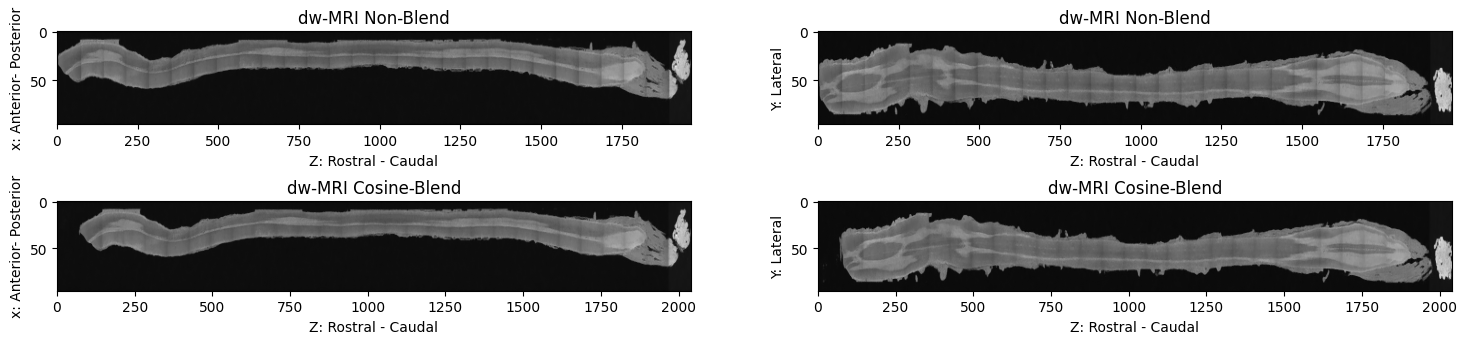

In [50]:
x = 33
y =  47
#Plot Saggital and Coronal Slices:
plt.figure(figsize=(18, 4))
plt.subplot(2, 2, 1)
plt.imshow(dwMRI[:,y,:,0], cmap = "gray", aspect= 3)
plt.ylabel("x: Anterior- Posterior")
plt.xlabel("Z: Rostral - Caudal")
plt.title("dw-MRI Non-Blend")

plt.subplot(2, 2, 2)
plt.imshow(dwMRI[x,:,:,0], cmap='gray', aspect= 3)
plt.ylabel("Y: Lateral")
plt.xlabel("Z: Rostral - Caudal")
plt.title("dw-MRI Non-Blend")


#Plot Saggital and Coronal Slices:
plt.subplot(2, 2, 3)
plt.imshow(dwMRI_blend[:,y,:,0], cmap = "gray", aspect= 3)
plt.ylabel("x: Anterior- Posterior")
plt.xlabel("Z: Rostral - Caudal")
plt.title("dw-MRI Cosine-Blend")

plt.subplot(2, 2, 4)
plt.imshow(dwMRI_blend[x,:,:,0], cmap='gray', aspect= 3)
plt.ylabel("Y: Lateral")
plt.xlabel("Z: Rostral - Caudal")
plt.title("dw-MRI Cosine-Blend")
plt.show()

In [ ]:
Combined_DTI_proproc_blend, affine = load_nifti("Combined_Data/Transposed/DTI_combined_preproc_blend_trans.nii.gz")
Combined_DTI_blend, affine = load_nifti("Combined_Data/Transposed/DTI_combined_blend_trans.nii.gz")

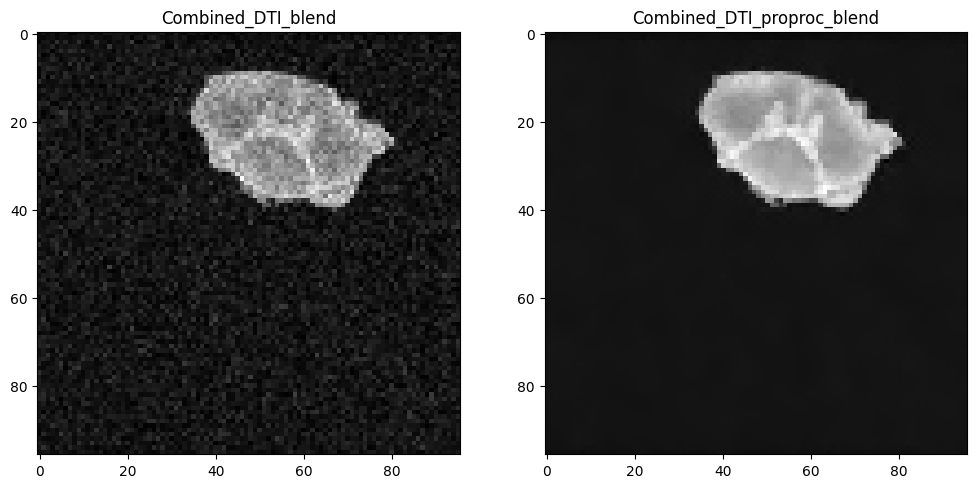

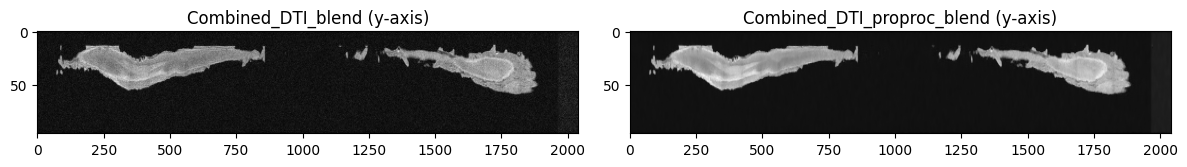

In [59]:
# Choose a representative slice and volume (e.g., middle of z and first volume)
z_idx = Combined_DTI_blend.shape[2] // 2
vol_idx = 0

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(Combined_DTI_blend[:, :, z_idx, vol_idx], cmap="gray")
axes[0].set_title("Combined_DTI_blend")
#axes[0].axis("off")

axes[1].imshow(Combined_DTI_proproc_blend[:, :, z_idx, vol_idx], cmap="gray" )
axes[1].set_title("Combined_DTI_proproc_blend")
#axes[1].axis("off")

# Plot y-axis (sagittal) slices for both images
y_idx = 30

fig2, axes2 = plt.subplots(1, 2, figsize=(12, 6))

axes2[0].imshow(Combined_DTI_blend[:, y_idx, :, vol_idx], cmap="gray", aspect=4)
axes2[0].set_title("Combined_DTI_blend (y-axis)")
#axes2[0].axis("off")

axes2[1].imshow(Combined_DTI_proproc_blend[:, y_idx, :, vol_idx], cmap="gray", aspect=4)
axes2[1].set_title("Combined_DTI_proproc_blend (y-axis)")
#axes2[1].axis("off")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'mean_signal across')

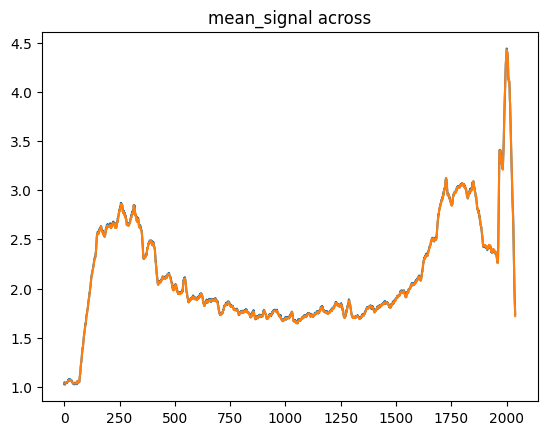

In [ ]:
mean_axis = np.mean(Combined_DTI_blend[:,:,:,0], axis = (0,1))
plt.plot(mean_axis)
plt.title("mean_signal across")

mean_axis = np.mean(Combined_DTI_proproc_blend[:,:,:,0], axis = (0,1))
plt.plot(mean_axis)
plt.title("mean_signal across")

**Combine dwMRI no blend, and bias field corrected:**

THIS IS BAD!!! First of all do bias-field correction post stitching! 

In [ ]:
#Find Paths (BIAS FIELD CORRECTED!!)
DTI_paths = PathFinder("DTI_SE_BFC_gibbs_denoised_affine_ok.nii.gz") 

#### ##Combine the Nifti files into one with homemade function (Combine_NIFTI) ######
DTI_combined, affine = Combine_NIFTI(DTI_paths)
DTI_combined_nifti = nib.Nifti1Image(DTI_combined,   affine = affine)
nib.save(DTI_combined_nifti, 'C:/DTI_SC/humanSC_400h/Combined_Data/DTI_BFC_combined_preproc.nii.gz')

### TRANSPOSE ####
DTI_combined_trans = np.transpose(DTI_combined, axes = (1,0,2,3))
#Save Data
DTI_combined_trans_nifti = nib.Nifti1Image(DTI_combined_trans,   affine = affine)
nib.save(DTI_combined_trans_nifti, 'C:/DTI_SC/humanSC_400h/Combined_Data/Transposed/DTI_BFC_combined_preproc_trans.nii.gz')

### FLIP ####
DTI_combined_trans_flipped = np.flip(DTI_combined_trans, axis = 0)
DTI_combined_flipped_nifti = nib.Nifti1Image(DTI_combined_trans_flipped,   affine = affine)
nib.save(DTI_combined_flipped_nifti, 'C:/DTI_SC/humanSC_400h/Combined_Data/Transposed and Flipped Axis/DTI_BFC_combined_preproc_trans_flipped.nii.gz')

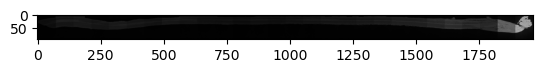

In [17]:
DTI_BFC_combined_trans, affine_temp = load_nifti('C:/DTI_SC/humanSC_400h/Combined_Data/Transposed/DTI_BFC_combined_preproc_trans.nii.gz')

plt.imshow(DTI_BFC_combined_trans[:,50,:,0], cmap = "gray")

In [ ]:
#### COMBINE Masked DTI Data  #####
#Find Paths
DTI_paths = PathFinder("maskdata.npy")

#Combine Masks
DTI_combined_masked = Combine_NIFTI(DTI_paths)

#Get affine (affine is the same for all dwMRI scans)
DTI_paths_aff = PathFinder("gibbs_denoised_affine_ok")
data_temp, affine = load_nifti(DTI_paths_aff[0]) #load one affine

#Save Data
DTI_combined_masked_nifti = nib.Nifti1Image(DTI_combined_masked,   affine = affine)
nib.save(DTI_combined_masked_nifti, 'C:/DTI_SC/humanSC_400h/Combined_Data/DTI_combined_preproc_masked.nii.gz')

### TRANSPOSE ####
DTI_combined_trans_mask = np.transpose(DTI_combined_masked, axes = (1,0,2,3))
#Save Data
DTI_combined_trans_nifti_mask = nib.Nifti1Image(DTI_combined_trans_mask,   affine = affine)
nib.save(DTI_combined_trans_nifti_mask, 'C:/DTI_SC/humanSC_400h/Combined_Data/DTI_combined_preproc_trans_masked.nii.gz')

### FLIP ####
DTI_combined_trans_flipped_masked = np.flip(DTI_combined_trans_mask, axis = 0)
DTI_combined_trans_flipped__masked_nifti = nib.Nifti1Image(DTI_combined_trans_flipped_masked,   affine = affine)
nib.save(DTI_combined_trans_flipped__masked_nifti, 'C:/DTI_SC/humanSC_400h/Combined_Data/DTI_combined_preproc_trans_flipped_masked.nii.gz')


# Bias Field Correction Of Combined Data

In [3]:
def evaluate_bias_field_correction(original_image = None, corrected_image = None, bias_field=None, xi = 180 , yi = 180, zi = 40):
    """
    Evaluate the bias field correction by comparing the original and corrected images.
    This function calculates the mean squared error (MSE) and displays both images.
    """
    original_data = original_image.numpy()
    corrected_data = corrected_image.numpy()
    bias_field_data = bias_field.numpy()

    # Calculate the mean squared error (MSE) between the original and corrected images
    mse = np.mean((original_data - corrected_data) ** 2)
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    # Display the original and corrected images in sagittal and axial views

    ###### Display Xi ######
    plt.subplot(1, 3, 1)
    plt.imshow(original_data[:, xi, :], cmap='gray')
    plt.title("Original (Coronal)")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(corrected_data[:, xi, :], cmap='gray')
    plt.title("Corrected (Coronal)")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(bias_field_data[:, xi, :], cmap='gray')
    plt.title("Bias Field (Coronal View)")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    ###### Display zi ######
    plt.subplot(1, 3, 1)
    plt.imshow(original_data[:, :, zi], cmap='gray')
    plt.title("Original (axial)")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(corrected_data[:, :, zi], cmap='gray')
    plt.title("Corrected (axial)")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(bias_field_data[:, :, zi], cmap='gray')
    plt.title("Bias Field (Axial View)")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    ###### Display yi ######
    plt.subplot(1, 3, 1)
    plt.imshow(original_data[yi, :], cmap='gray')
    plt.title("Original (Sagittal View)")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(corrected_data[yi, :], cmap='gray')
    plt.title("Corrected (Sagittal View)")
    plt.axis("off")


    plt.subplot(1,3,3)
    plt.imshow(bias_field_data[yi,:, :], cmap='gray')
    plt.title("Bias Field (Sagittal View)")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()



    #### Compute mean intensity along z (slice axis) ####
    original_data = original_image.numpy()
    corrected_data = corrected_image.numpy()

    # Mean intensity along axes
    # Only calculate mean intensity on non-zero voxels for each slice
    mean_intensity_before = [
        original_data[:, :, z][original_data[:, :, z] > 0].mean() if np.any(original_data[:, :, z] > 0) else 0
        for z in range(original_data.shape[2])
    ]
    mean_intensity_after = [
        corrected_data[:, :, z][corrected_data[:, :, z] > 0].mean() if np.any(corrected_data[:, :, z] > 0) else 0
        for z in range(corrected_data.shape[2])
    ]
    mean_intensity_before_x = [
        original_data[x, :, :][original_data[x, :, :] > 0].mean() if np.any(original_data[x, :, :] > 0) else 0
        for x in range(original_data.shape[0])
    ]
    mean_intensity_after_x = [
        corrected_data[x, :, :][corrected_data[x, :, :] > 0].mean() if np.any(corrected_data[x, :, :] > 0) else 0
        for x in range(corrected_data.shape[0])
    ]
    mean_intensity_before_y = [
        original_data[:, y, :][original_data[:, y, :] > 0].mean() if np.any(original_data[:, y, :] > 0) else 0
        for y in range(original_data.shape[1])
    ]
    mean_intensity_after_y = [
        corrected_data[:, y, :][corrected_data[:, y, :] > 0].mean() if np.any(corrected_data[:, y, :] > 0) else 0
        for y in range(corrected_data.shape[1])
    ]

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    plt.plot(mean_intensity_before, label='Before', linestyle='--')
    plt.plot(mean_intensity_after, label='After', linestyle='-')
    plt.xlabel('Slice (z-axis)')
    plt.ylabel('Mean Intensity')
    plt.title('Mean Intensity (z-axis)')
    plt.legend()
    plt.grid()

    # Add vertical lines every 70th slice
    for x in range(0, len(mean_intensity_before), 70):
        plt.axvline(x=x, color='r', linestyle=':', alpha=0.5)

   

    plt.subplot(1, 3, 2)
    plt.plot(mean_intensity_before_x, label='Before', linestyle='--')
    plt.plot(mean_intensity_after_x, label='After', linestyle='-')
    plt.xlabel('Slice (x-axis)')
    plt.ylabel('Mean Intensity')
    plt.title('Mean Intensity (x-axis)')
    plt.legend()
    plt.grid()

    plt.subplot(1, 3, 3)
    plt.plot(mean_intensity_before_y, label='Before', linestyle='--')
    plt.plot(mean_intensity_after_y, label='After', linestyle='-')
    plt.xlabel('Slice (y-axis)')
    plt.ylabel('Mean Intensity')
    plt.title('Mean Intensity (y-axis)')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

    # Coefficient of variation (CV) across slices

    cv_before = np.std(mean_intensity_before) / np.mean(mean_intensity_before)
    cv_after = np.std(mean_intensity_after) / np.mean(mean_intensity_after)
    print(f"CV before: {cv_before:.4f}, CV after: {cv_after:.4f}")


    # Histogram of intensities before and after correction
    # Flatten and remove zeros
    original_flat = original_data[original_data > 0].flatten()
    corrected_flat = corrected_data[corrected_data > 0].flatten()


    plt.hist(original_flat, bins=100, alpha=0.5, label='Before')
    plt.hist(corrected_flat, bins=100, alpha=0.5, label='After')
    plt.legend()
    plt.title("Histogram of Intensities")
    plt.show()
    
    return mse

In [ ]:
full_combined_preproc_trans = ants.image_read("Combined_Data/Transposed/RARE_preproc_combined_blend_trans.nii.gz")


bias_field = ants.n4_bias_field_correction(full_combined_preproc_trans,
                                                shrink_factor = 4,  # Adjust shrink factor for speed vs accuracy
                                                mask=None,  # Use the mask if available, or set to
                                                convergence= {'iters': [50,50,50,30], 'tol': 1e-6},                                                
                                                spline_param = 2 ,  # Adjust spline parameter for bias field smoothness
                                                return_bias_field= True,  # Set to True if you want to return the bias fieldias field
                                                verbose=False)  # Set to True for detailed output

RARE_corrected_full_combined_preproc_trans = full_combined_preproc_trans / bias_field

evaluate_bias_field_correction(original_image=full_combined_preproc_trans, corrected_image=RARE_corrected_full_combined_preproc_trans, bias_field=bias_field, xi=180, yi=180, zi=40)
#ants.image_write(RARE_corrected_full_combined_preproc_trans, "C:\DTI_SC\humanSC_400h\Combined_Data\Transposed\RARE_BFC_2_combined_preproc_trans.nii.gz")

#ants.image_write(bias_field,"Combined_data/bias_field_RARE_cosine_combined_2_2_2.nii.gz")

## **Rotated Image T2**

In [47]:
################ T2 IMAGE #######################
t2 = ants.image_read("Combined_Data/Rotated and Transposed/RARE_combined_trans_denoised_gibbs_masked_rotated.nii.gz")


bias_field = ants.n4_bias_field_correction(t2,
                                                shrink_factor = 1,  # Adjust shrink factor for speed vs accuracy
                                                mask=None,  # Use the mask if available, or set to
                                                convergence= {'iters': [50,50,50,30], 'tol': 1e-6},                                                
                                                spline_param = 20 ,  # Adjust spline parameter for bias field smoothness
                                                return_bias_field= True,  # Set to True if you want to return the bias fieldias field
                                                verbose=False)  # Set to True for detailed output

RARE_corrected_full_combined_preproc_trans = t2 / bias_field



## Save Images
ants.image_write(RARE_corrected_full_combined_preproc_trans,
                 "Combined_Data/Rotated and Transposed/RARE_combined_trans_denoised_gibbs_masked_rotated_BFC_corrected20.nii.gz")

ants.image_write(bias_field,
                 "Combined_Data/Rotated and Transposed/bias_field_RARE_combined_20.nii.gz")

Mean Squared Error (MSE): 1.3871


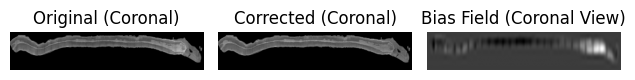

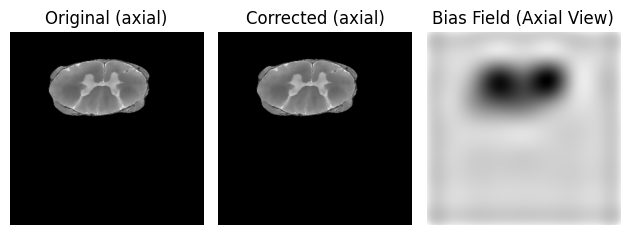

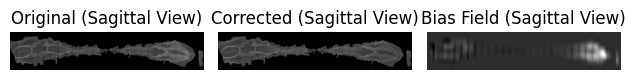

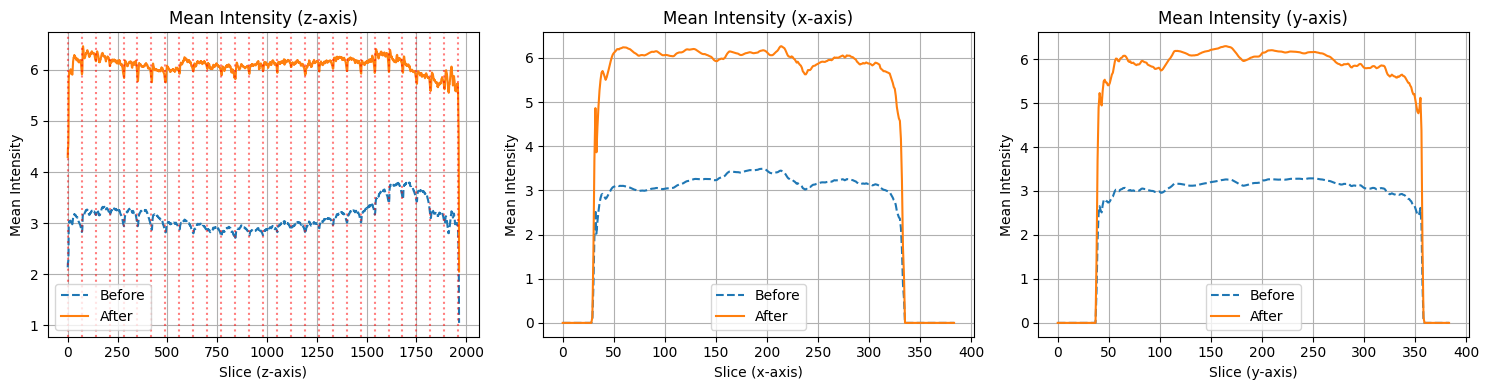

CV before: 0.0831, CV after: 0.0328


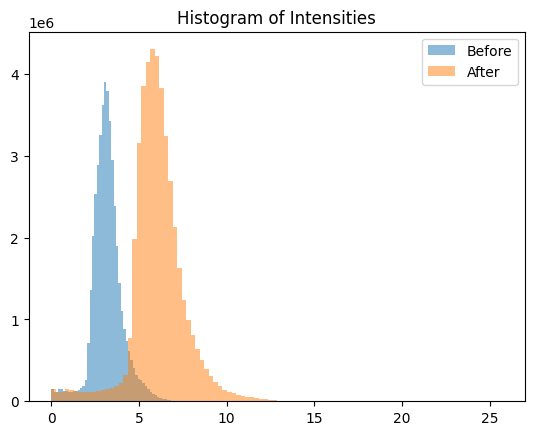

np.float32(1.3870918)

In [48]:
evaluate_bias_field_correction(original_image= t2, 
                               corrected_image=RARE_corrected_full_combined_preproc_trans, 
                               bias_field=bias_field, 
                               xi=180, yi=145, zi=500)

## **Rotated Image dwMRI**

In [ ]:
#### 
dwMRI = ants.image_read("Combined_Data/Rotated and Transposed/DTI_combined_preproc_trans_masked_rotated.nii.gz")
b0_mean = ants.image_read("Combined_Data/Rotated and Transposed/B0_mean.nii.gz")

bias_field = ants.n4_bias_field_correction(b0_mean,
                                                shrink_factor = 1,  # Adjust shrink factor for speed vs accuracy
                                                mask= None,  # Use the mask if available, or set to
                                                convergence= {'iters': [50,50,50,30], 'tol': 1e-6},                                                
                                                spline_param = 20 ,  # Adjust spline parameter for bias field smoothness
                                                return_bias_field= True,  # Set to True if you want to return the bias fieldias field
                                                verbose=False)  # Set to True for detailed output

dwMRI_corrected_full_combined_preproc_trans_rotated = b0_mean / bias_field



# Convert images to NumPy
dwMRI_np = dwMRI.numpy()
bias_np = bias_field.numpy()

# Sanity check: shapes
assert dwMRI_np.shape[:3] == bias_np.shape, "Mismatch in spatial dimensions!"

# Divide each volume by the same bias field
dwMRI_corrected_np = dwMRI_np / bias_np[..., np.newaxis]  # broadcast along 4th dim



dwMRI_corrected = ants.from_numpy(
    dwMRI_corrected_np,
    origin=dwMRI.origin,
    spacing=dwMRI.spacing,
    direction=dwMRI.direction
)

###  Save Images ###
#B0
ants.image_write(dwMRI_corrected_full_combined_preproc_trans_rotated,
                 "Combined_Data/Rotated and Transposed/B0_BFC_corrected20.nii.gz")
#dwMRI
ants.image_write(dwMRI_corrected,
                 "Combined_Data/Rotated and Transposed/DTI_combined_preproc_trans_masked_rotated_BFC_corrected20.nii.gz")

#bias field
ants.image_write(bias_field,
                 "Combined_Data/Rotated and Transposed/bias_field_dwMRI_b0_combined_20.nii.gz")

Mean Squared Error (MSE): 9.0884


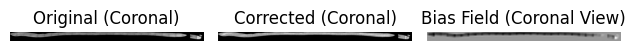

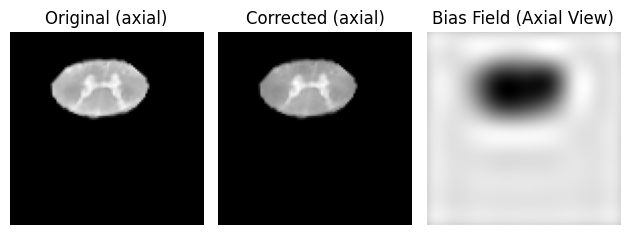

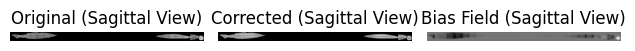

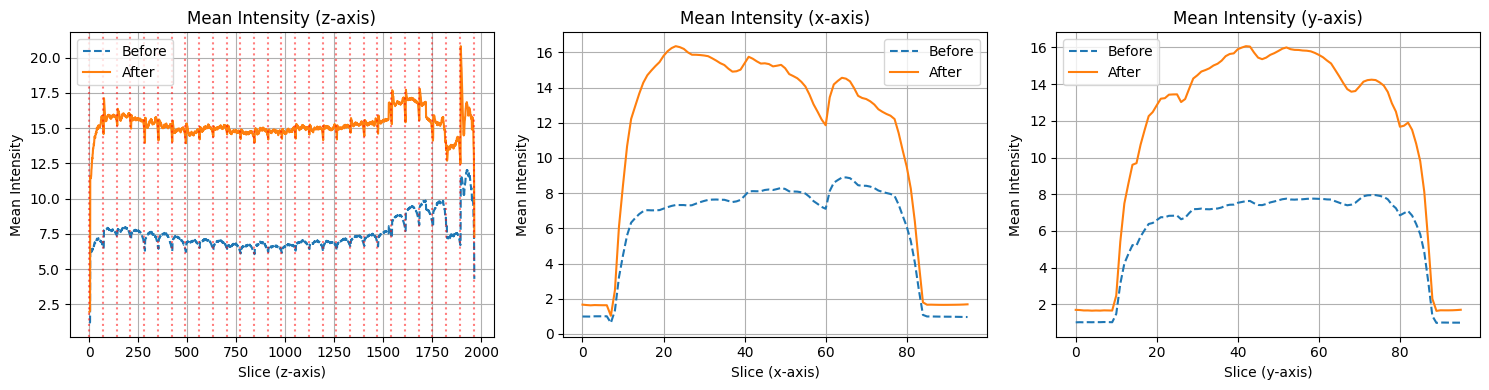

CV before: 0.1509, CV after: 0.0712


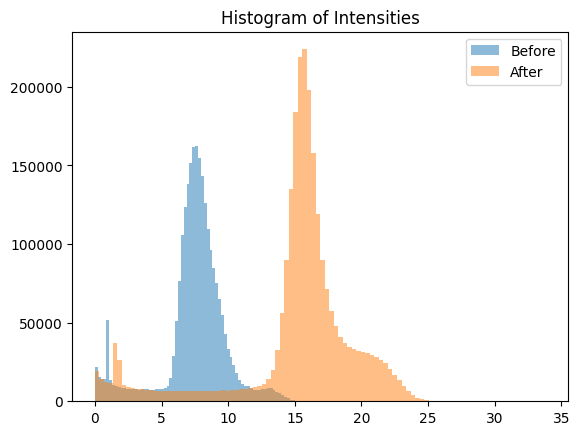

np.float32(9.08836)

In [ ]:
evaluate_bias_field_correction(original_image= b0_mean, 
                               corrected_image= dwMRI_corrected_full_combined_preproc_trans_rotated, 
                               bias_field= bias_field, 
                               xi = 45,yi = 45,zi = 500)

In [10]:
dwMRI_corrected = ants.image_read("Combined_Data/Rotated and Transposed/DTI_combined_preproc_trans_masked_rotated_BFC_corrected20.nii.gz")
dwMRI = ants.image_read("Combined_Data/Rotated and Transposed/DTI_combined_preproc_trans_masked_rotated.nii.gz")
t2_corrected = ants.image_read("Combined_Data/Rotated and Transposed/RARE_combined_trans_denoised_gibbs_masked_rotated_BFC_corrected20.nii.gz")

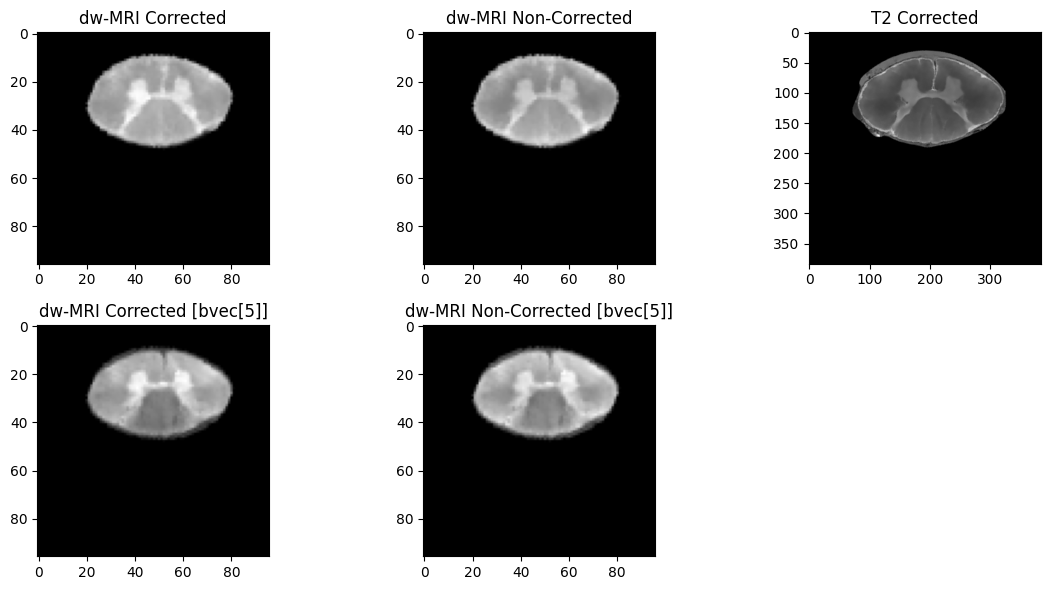

In [17]:
z = 100

plt.figure(figsize=(12, 6))


plt.subplot(2, 3, 1)
plt.imshow(dwMRI_corrected.numpy()[:,:,z,0], cmap = "gray")
plt.title("dw-MRI Corrected")

plt.subplot(2, 3, 2)
plt.imshow(dwMRI.numpy()[:,:,z,0], cmap = "gray")
plt.title("dw-MRI Non-Corrected")

plt.subplot(2, 3, 3)
plt.imshow(t2_corrected.numpy()[:,:,z], cmap = "gray")
plt.title("T2 Corrected")



plt.subplot(2, 3, 4)
plt.imshow(dwMRI_corrected.numpy()[:,:,z,5], cmap = "gray")
plt.title("dw-MRI Corrected [bvec[5]]")

plt.subplot(2, 3, 5)
plt.imshow(dwMRI.numpy()[:,:,z,5], cmap = "gray")
plt.title("dw-MRI Non-Corrected [bvec[5]]")


plt.tight_layout()
plt.show()

## **Transposed T2**

In [2]:
################ T2 IMAGE #######################
t2 = ants.image_read("Combined_Data/Transposed/RARE_combined_trans_denoised_gibbs_masked.nii.gz")

bias_field = ants.n4_bias_field_correction(t2,
                                                shrink_factor = 1,  # Adjust shrink factor for speed vs accuracy
                                                mask=None,  # Use the mask if available, or set to
                                                convergence= {'iters': [50,50,50,30], 'tol': 1e-6},                                                
                                                spline_param = 20 ,  # Adjust spline parameter for bias field smoothness
                                                return_bias_field= True,  # Set to True if you want to return the bias fieldias field
                                                verbose=False)  # Set to True for detailed output

RARE_corrected_full_combined_preproc_trans = t2 / bias_field


## Save Images
ants.image_write(RARE_corrected_full_combined_preproc_trans,
                 "Combined_Data/Transposed/RARE_combined_trans_denoised_gibbs_masked_BFC_corrected20.nii.gz")

ants.image_write(bias_field,
                 "Combined_Data/Transposed/bias_field_RARE_combined_20.nii.gz")

In [3]:
RARE_corrected_full_combined_preproc_trans.shape

(384, 384, 1965)

## **Tranposed dwMRI**

In [ ]:
########### TRANSPOSED BFC CORRECTION 
dwMRI = ants.image_read("Combined_Data/Transposed/DTI_combined_preproc_trans_masked.nii.gz")

b0 = dwMRI[:,:,:,0:3].numpy()
b0_mean = np.mean(b0, axis=3)

direction_clean = np.array(dwMRI.direction[:3, :3], dtype=np.float64, order='C')
#print("Shape:", direction_clean.shape)
#print("Contiguous:", direction_clean.flags['C_CONTIGUOUS'])

b0_mean_ants = ants.from_numpy(
    b0_mean,
    origin= dwMRI.origin[:3],
    spacing= dwMRI.spacing[:3],
    direction= direction_clean
)

ants.image_write(b0_mean_ants, "Combined_Data/Transposed/B0_mean.nii.gz")


bias_field = ants.n4_bias_field_correction(b0_mean_ants,
                                                shrink_factor = 1,  # Adjust shrink factor for speed vs accuracy
                                                mask= None,  # Use the mask if available, or set to
                                                convergence= {'iters': [50,50,50,30], 'tol': 1e-6},                                                
                                                spline_param = 20 ,  # Adjust spline parameter for bias field smoothness
                                                return_bias_field= True,  # Set to True if you want to return the bias fieldias field
                                                verbose=False)  # Set to True for detailed output

dwMRI_corrected_full_combined_preproc_trans = b0_mean_ants / bias_field



# Convert images to NumPy
dwMRI_np = dwMRI.numpy()
bias_np = bias_field.numpy()

# Sanity check: shapes
assert dwMRI_np.shape[:3] == bias_np.shape, "Mismatch in spatial dimensions!"

# Divide each volume by the same bias field
dwMRI_corrected_np = dwMRI_np / bias_np[..., np.newaxis]  # broadcast along 4th dim



dwMRI_corrected = ants.from_numpy(
    dwMRI_corrected_np,
    origin=dwMRI.origin,
    spacing=dwMRI.spacing,
    direction=dwMRI.direction
)

###  Save Images ###
#B0
ants.image_write(dwMRI_corrected_full_combined_preproc_trans,
                 "Combined_Data/Transposed/B0_BFC_corrected20.nii.gz")
#dwMRI
ants.image_write(dwMRI_corrected,
                 "Combined_Data/Transposed/DTI_combined_preproc_trans_masked_BFC_corrected20.nii.gz")

#bias field
ants.image_write(bias_field,
                 "Combined_Data/Transposed/bias_field_dwMRI_b0_combined_20.nii.gz")

# Histogram Equalization 

EXPERIMENTAL

# Plot The Combined DTI and Anatomical Data

In [ ]:
#Load in Combined Data
RARE_all_flipped , Affine_all = load_nifti("Combined_Data/Transposed and Flipped Axis/RARE_BFC_combined_trans_flipped.nii.gz")
print(RARE_all_flipped.shape)

DTI_all_flipped , DTI_Affine_all = load_nifti("C:/DTI_SC/humanSC_400h/Combined_Data/DTI_combined_preproc_trans_flipped.nii.gz")
print(DTI_all_flipped.shape)

DTI_all_flipped_masked , DTI_Affine_all = load_nifti("C:/DTI_SC/humanSC_400h/Combined_Data/DTI_combined_preproc_trans_flipped_masked.nii.gz")
print(DTI_all_flipped_masked.shape)

NameError: name 'load_nifti' is not defined

In [3]:
DTI_combined, DTI_combined_affine = load_nifti("Combined_Data/Transposed/DTI_combined_preproc_trans.nii.gz")

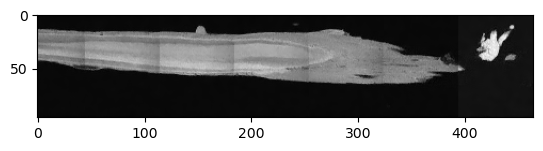

In [8]:
plt.imshow(DTI_combined[:,40,1500:,0], cmap = "gray")

In [ ]:
#Plot {DTI_masked+ preproc & DTI_preproc & RARE2d} all axial slices  # PRESS space to continue
for z in range(RARE_all_flipped.shape[2]):
    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    # Remove the unused subplot
    fig.delaxes(axes[1, 1])
    
    axes[1,0].imshow(DTI_all_flipped_masked[:,:,z,0], "gray")
    axes[1,0].invert_yaxis()
    axes[1,0].set_title("DTI Masked: Z-axis = " + str(z))
    
    axes[0,1].imshow(DTI_all_flipped[:,:,z,0], "gray")
    axes[0,1].invert_yaxis()
    axes[0,1].set_title("DTI: Z-axis = " + str(z))

    axes[0,0].imshow(RARE_all_flipped[:,:,z],"gray")      
    axes[0,0].invert_yaxis()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
    axes[0,0].set_title("Struc: Z-axis = " + str(z))
    
    plt.tight_layout()
    plt.show()
    
    while True:
            time.sleep(0.1)  # Small delay to avoid multiple triggers
            IPython.display.clear_output(wait=True)
            break
        

    while True:
         if keyboard.is_pressed('space'):        
             print("Continuing...")
             plt.close('all')  # Close all matplotlib plots
             IPython.display.clear_output(wait=True)
             time.sleep(0.05)  # Small delay to avoid multiple triggers
             break